# Trabajo Semanal N°2
### Alumno: Magdalena Guida

Para los siguientes circuitos se calcula su $H(s)=\frac{V_0}{V_i}$. Se calcula y grafica su respuesta en modulo y fase, indicando comportamiento asintotico donde corresponda. Analizar de que tipo de circuito se trata y cual es su ancho de banda. 


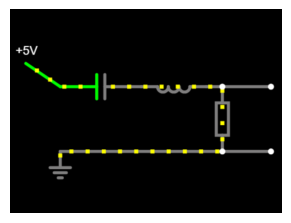

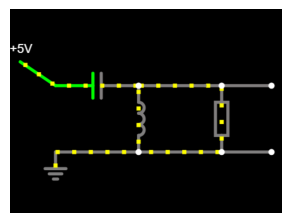

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = 'C:/Users/magui/APS/CircuitoA.png'

# Cargar y mostrar la imagen
img = mpimg.imread(img_path)
plt.figure(figsize=(3.5,3.5))
plt.imshow(img)
plt.axis('off')  # Para quitar los ejes
plt.show()

img_path1 = 'C:/Users/magui/APS/CircuitoB.png'

# Cargar y mostrar la imagen
img1 = mpimg.imread(img_path1)
plt.figure(figsize=(3.5,3.5))
plt.imshow(img1)
plt.axis('off')  # Para quitar los ejes
plt.show()

Se planteo para ambos circuitos la ecuacion $H(s)$, y luego se reemplazaron las siguentes igualdades para obtener las funciones transferencia: 
- $s = jw + \theta$,     con $ \theta = 0$
- $\frac{1}{L * C} = W_0  ^2$
- $\frac{R}{L} = \frac{W_0}{Q}$

y todas las que se puedan conseguir, partiendo de estas. 


Las ecuaciones de transferencia son: 
- $T_a (wj) = \frac{\frac{W_0}{Q}*wj}{- W^2 +\frac{W_0}{Q}*wj+ W_0^2}$
  
- $T_b (wj) = \frac{-W^2}{- W^2 +\frac{W_0}{Q}*wj+ W_0^2}$

El metodo analitico es una forma de analisis aplicada a las ecuaciones de transferencia para obtener las respuestas de modulo y fase. Primero se calcula limite de $W$ tendiendo tanto a $0$ como a $\infty$, donde la funcion $T_a(wj)$ tiende a $0$, lo que se refleja graficamente en la respuesta al modulo como dos asintotas de pendientes $m = \pm|20*\frac{dB}{dec}|$. Luego, se calcula el aporte de fase de cada polo y cero de la funcion.Para $W \to 0$, en este caso, los polos existen en $\mathbb{C}$ y son complejos complementarios, por lo que su aporte se cancela, mientras que el cero aporta un OFFSET de $\frac{\pi}{2}$. Para $W \to \infty$, los polos aportan $\frac{-\pi}{2}$ cada uno, y el cero $\frac{\pi}{2}$, lo que da un total de $\frac{-\pi}{2}$. Estos valores son los que toman la cota superior e inferior para la funcion de respuesta de fase.

Se le aplica el mismo metodo a la funcion $T_b(wj)$ y resulta en, para la respuesta en modulo, una asintota de pendiente $-2*20\frac{dB}{dec}$, que se debe al cero doble en $0$. En el caso de la respuesta a la fase, cuando $W \to 0$ los ceros aportan $ 2 * \frac{\pi}{2} = \pi$, y por tener el mismo denominador, para el aporte de los polos sucede lo mismo que en la funcion analizada antes. Ahora, cuando $W \to \infty$ los ceros y los polos aportan el mismo valor en modulo $\frac{\pi}{2}$, pero signo contrario por lo que se cancelan. Asi, la cota superior toma un valor de $\pi$ y la inferior $0$.

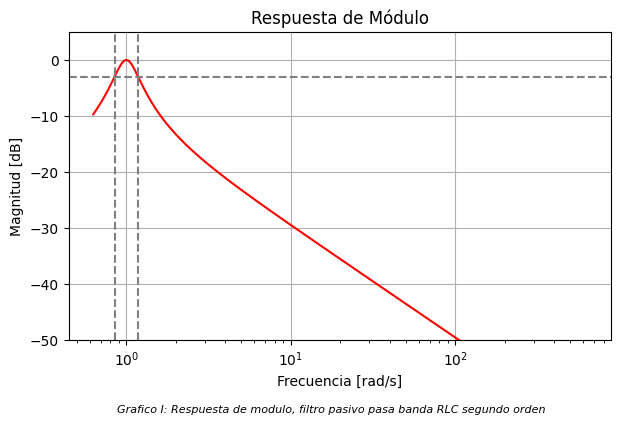

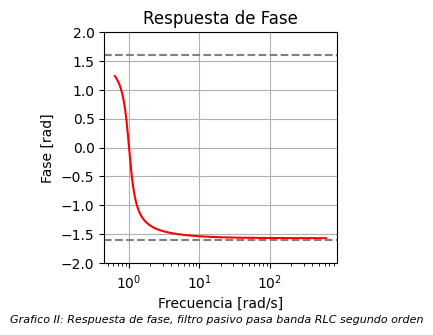

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir la función de transferencia H(s) = V0 / Vi
W0 = 1
Q=3 #Defino con valores arbitrarios, la unica condicion es Q>1/2 para tener polos complejos conjugados
numerador = [W0/Q, 0]  # Numerador 
denominador = [1, W0/Q, W0]  # Denominador 

# función transferencia
sistema = signal.TransferFunction(numerador, denominador)


f = np.logspace(-1, 2, 400)  #  (de 0.1 a 100 rad/s)
w = 2 * np.pi * f

# Respuesta al módulo y a la fase
w, mag, fase_grados = signal.bode(sistema, w)

# Convertir fase de grados a radianes
fase_radianes = np.deg2rad(fase_grados)

# Grafico rta de módulo 
plt.figure(figsize=(7, 4))
plt.ylim(-50,5)
plt.semilogx(w, mag, "r")  #  escala logarítmica
plt.title("Respuesta de Módulo")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Magnitud [dB]")
plt.axhline(y=-3, color="grey", linestyle="--")
plt.axvline(x=0.85, color="grey", linestyle="--") # W1
plt.axvline(x=1.18, color="grey", linestyle="--") # W2, donde W2 - W1 = ancho de banda
plt.grid(True)
plt.figtext(0.5, -0.07, 'Grafico I: Respuesta de modulo, filtro pasivo pasa banda RLC segundo orden', ha='center', fontsize=8, fontstyle='italic')
plt.show()

# Grafico rta de fase 
plt.figure(figsize=(3, 3))
plt.ylim(-2 , 2)  
plt.semilogx(w, fase_radianes, "r")
plt.title("Respuesta de Fase")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Fase [rad]")
plt.axhline(y=1.6, color="grey", linestyle="--")
plt.axhline(y=-1.6, color="grey", linestyle="--")
plt.grid(True)
plt.figtext(0.5, -0.09, 'Grafico II: Respuesta de fase, filtro pasivo pasa banda RLC segundo orden', ha='center', fontsize=8, fontstyle='italic')
plt.show()
plt.show()

Se graficaron las respuetas de respuesta al modulo y a la fase, con esta informacion ya se puede determinar un filtro pasa banda. En el Grafico I, se aprecia el corte de la funcion sobre $y=-3 dB$, que determina los valores para $x=W_1$ y$x=W_2$, con estos se calucla $ANCHO DE BANDA = W_2 - W_1$. Para el grafico de repuesta de fase, se obtiene la respuesta esperada, comenzando desde la cota superior $y=\frac{\pi}{2} \approx 1.6$ yendo hatsa la cota inferior $y=\frac{\pi}{2}\approx-1.6$ mientras la frecuencia aumenta. 

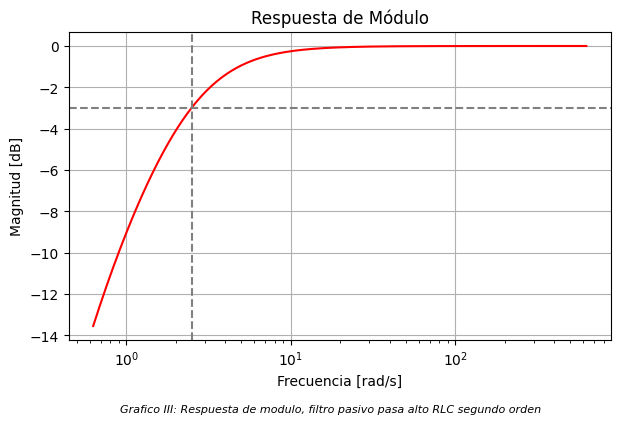

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir la función de transferencia H(s) = V0 / Vi
W0 = 1
Q=0.5
 #Defino con valores arbitrarios 
numerador = [(-1),0,0]  # Numerador 
denominador = [(-1), W0/Q, W0**2]  # Denominador 

# función transferencia
sistema = signal.TransferFunction(numerador, denominador)


f = np.logspace(-1, 2, 300)  #  (de 0.1 a 100 rad/s)
w = f* 2* np.pi

# Respuesta al módulo y a la fase
w, mag, fase_grados = signal.bode(sistema, w)

# Convertir fase de grados a radianes
fase_radianes = np.deg2rad(fase_grados)

#Grafico rta de módulo 
plt.figure(figsize=(7, 4))
plt.semilogx(w, mag, "r")  #  escala logarítmica
plt.title("Respuesta de Módulo")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Magnitud [dB]")
plt.axhline(y=-3, color="grey", linestyle="--")
plt.axvline(x=2.5, color="grey", linestyle="--") # Wc
plt.grid(True)
plt.figtext(0.5, -0.07, 'Grafico III: Respuesta de modulo, filtro pasivo pasa alto RLC segundo orden', ha='center', fontsize=8, fontstyle='italic')
plt.show()
plt.show()


Al analizar el Grafico III, reconocemos un fitro pasa alto pasivo, de segundo orden. Esto sale de ver el punto en donde la funcion corta a $y=-3dB$, para determinar la frecuencia de corte $W_c$ y asi su ancho de banda. 

Los codigos desarrollados en Spyder, muestran graficos congruentes con el metodo analitico utlizado para obtener aproximaciones del comportamiento de los filtros partiendo del diagrama de sus circuitos. Se dio una excepcion, para el grafico de respuesta de fase del filtro pasa altos, donde no se pudo conseguir que coincida el grafico con lo calculado en el analizis. 